In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda','Honda','HONDA'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [115]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'honda_heritage.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

4213


In [116]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

In [117]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]

In [118]:
english_tweets = english_tweets.drop_duplicates(subset='text');

In [120]:
english_tweets = english_tweets[english_tweets['text'].str.contains('crosstour')]

In [121]:
len(english_tweets)

263

In [125]:
english_tweets

,text,lang,sample,retweeted
19,it's official: honda kills crosstour as new suvs take over http://t.co/mcym7t1onq http://t.co/5rybfblfkl,en,It's Official: Honda,False
24,honda killing off crosstour in big production shift http://t.co/frjmtz22of,en,Honda killing off Cr,False
25,honda killing off crosstour in big production shift http://t.co/pafjc4mljp,en,Honda killing off Cr,False
60,bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7,en,Bad news everyone. T,False
61,end of the road for honda crosstour http://t.co/6dokzagnh1 http://t.co/vojtnxqgdj,en,End of the road for,False
73,bad news everyone. the honda crosstour is dead http://t.co/yu8gy6gfm7 http://t.co/qf8jrwib5u,en,Bad news everyone. T,False
84,honda killing off crosstour in big production shift: the hatchback never caught on with consumers,en,Honda killing off Cr,False
99,rt @jalopnik: bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7,en,RT @Jalopnik: Bad ne,False
146,honda killing off crosstour in big production shift http://t.co/6zdklmu5hk,en,Honda killing off Cr,False
156,"dtn autos: honda to drop crosstour, move accord hybrid output to japan: honda will stop producing the crosstou... http://t.co/oxogaj44tv",en,DTN Autos: Honda to,False


In [122]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")

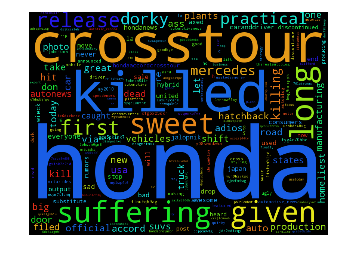

In [123]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
#wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "civic.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [124]:
wc.process_text(text)[:50]

[('honda', 1.0),
 ('crosstour', 0.9238410596026491),
 ('killed', 0.3841059602649007),
 ('long', 0.3841059602649007),
 ('suffering', 0.3841059602649007),
 ('given', 0.38079470198675497),
 ('sweet', 0.38079470198675497),
 ('release', 0.3741721854304636),
 ('first', 0.24172185430463577),
 ('practical', 0.23509933774834438),
 ('dorky', 0.2152317880794702),
 ('mercedes', 0.20860927152317882),
 ('killing', 0.1490066225165563),
 ('production', 0.1490066225165563),
 ('car', 0.1456953642384106),
 ('shift', 0.1423841059602649),
 ('big', 0.13245033112582782),
 ('dead', 0.10264900662251655),
 ('new', 0.076158940397351),
 ('usa', 0.059602649006622516),
 ('today', 0.059602649006622516),
 ('door', 0.039735099337748346),
 ('ass', 0.039735099337748346),
 ('let', 0.039735099337748346),
 ('road', 0.039735099337748346),
 ('adios', 0.039735099337748346),
 ('hit', 0.039735099337748346),
 ('one', 0.03642384105960265),
 ('kill', 0.03642384105960265),
 ('don', 0.03642384105960265),
 ('vehicles', 0.033112582781

In [171]:
STOPWORDS

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'de',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'ebay',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'https',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 